## Preprocess and Imports

In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt

from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *

from sklearn.metrics import confusion_matrix
import itertools
%matplotlib inline

Using TensorFlow backend.


In [2]:
!git clone https://github.com/Droid021/mlclassification.git

fatal: destination path 'mlclassification' already exists and is not an empty directory.


In [8]:
model = keras.applications.densenet.DenseNet121()

Instructions for updating:
Colocations handled automatically by placer.
33193984/33188688 [==============================] - 0s 0us/step


In [0]:
img_path = '/content/mlclassification'

In [0]:
def prepare_image(file):
  img = image.load_img(img_path + file,
                      target_size=(224,224))
#   img = load_image(img_path + file, target_size=(224,224))
  img_array = image.img_to_array(img)
  img_array_expanded_dims = np.expand_dims(img_array, axis=0)
  return keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

## Split Training Data into training and validation sets

In [5]:
!pip install split-folders
!split_folders '/content/mlclassification/training_set' --ratio .8 .2

## Display Image

(1, 300, 300, 3)


/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


(-0.5, 299.5, 299.5, -0.5)

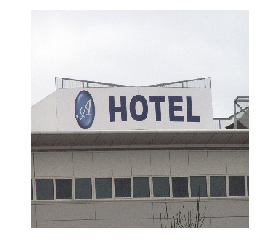

In [6]:
from keras.preprocessing.image import load_img, img_to_array, array_to_img

sample_img_path = '/content/output/train/hotels/00000008.jpg'  #'sample.jpg'
sample_img = load_img(sample_img_path, target_size=(300,300))
sample_img_tensor = img_to_array(sample_img)
sample_img_tensor = np.expand_dims(sample_img_tensor, axis=0)
sample_img_tensor /= 255.

print(sample_img_tensor.shape)
plt.imshow(sample_img_tensor[0])
plt.grid('off') 
plt.axis('off') 

In [9]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
__________________________________________________________________________________________________
conv1/relu

## Test With Imagenet Labels

In [11]:
preprocessed_image = prepare_image('/test_set/not-hotels/04784.jpg')
predictions = model.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

[[('n04285008', 'sports_car', 0.83772767),
  ('n04037443', 'racer', 0.09662994),
  ('n02974003', 'car_wheel', 0.01912453),
  ('n03100240', 'convertible', 0.013501857),
  ('n02814533', 'beach_wagon', 0.0107885655)]]

## Train Hotel vs Not Hotel Images

In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras import backend as K
from keras.models import Sequential, Model
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from sklearn.metrics import confusion_matrix
import itertools
%matplotlib inline

Using TensorFlow backend.


In [0]:
train_path = "/content/output/train"
valid_path = "/content/output/val"
test_path = "/content/mlclassification/test_set"

In [3]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224, 224),
                                                         classes=['hotels','not-hotels'], batch_size=64)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224, 224),
                                                         classes=['hotels','not-hotels'], batch_size=64)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224, 224),
                                                         classes=['hotels','not-hotels'], batch_size=64,
                                                        shuffle=False)

Found 663 images belonging to 2 classes.
Found 168 images belonging to 2 classes.
Found 150 images belonging to 2 classes.


In [4]:
model = keras.applications.densenet.DenseNet121()

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
__________________________________________________________________________________________________
conv1/relu

In [0]:
x = model.layers[-3].output
predictions = Dense(2, activation='softmax')(x)
model = Model(inputs=model.input, outputs=predictions)

In [27]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_3 (ZeroPadding2D (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d_3[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
__________________________________________________________________________________________________
conv1/relu

### Freeze layers

In [0]:
for layer in model.layers[:-1]:
  layer.trainable = False

## Train Model

In [0]:
model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
model.fit_generator(train_batches, steps_per_epoch=11,
                   validation_data=valid_batches, validation_steps=3, epochs=40, verbose=2)

Epoch 1/40


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:966: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


 - 26s - loss: 0.5585 - acc: 0.7203 - val_loss: 3.0397 - val_acc: 0.4167
Epoch 2/40
 - 20s - loss: 0.5070 - acc: 0.7505 - val_loss: 2.9555 - val_acc: 0.3869
Epoch 3/40
 - 21s - loss: 0.4966 - acc: 0.7733 - val_loss: 2.5193 - val_acc: 0.4762
Epoch 4/40
 - 20s - loss: 0.4794 - acc: 0.7790 - val_loss: 2.8723 - val_acc: 0.4345
Epoch 5/40
 - 19s - loss: 0.4346 - acc: 0.8099 - val_loss: 2.6279 - val_acc: 0.4583
Epoch 6/40
 - 20s - loss: 0.4064 - acc: 0.8549 - val_loss: 2.7897 - val_acc: 0.4524
Epoch 7/40
 - 20s - loss: 0.4123 - acc: 0.8445 - val_loss: 2.6086 - val_acc: 0.4524
Epoch 8/40
 - 20s - loss: 0.3773 - acc: 0.8551 - val_loss: 2.2831 - val_acc: 0.4643
Epoch 9/40
 - 20s - loss: 0.3695 - acc: 0.8722 - val_loss: 2.4790 - val_acc: 0.4762
Epoch 10/40
 - 19s - loss: 0.3632 - acc: 0.8692 - val_loss: 2.6168 - val_acc: 0.4940
Epoch 11/40
 - 21s - loss: 0.3406 - acc: 0.8863 - val_loss: 2.4526 - val_acc: 0.4821
Epoch 12/40
 - 19s - loss: 0.3317 - acc: 0.8856 - val_loss: 2.4630 - val_acc: 0.5119


## Predict Hotels vs Not Hotels

In [8]:
test_labels = test_batches.classes
test_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [9]:
test_batches.class_indices

{'hotels': 0, 'not-hotels': 1}

In [10]:
predictions = model.predict_generator(test_batches, steps=3, verbose=0)

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:966: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


In [0]:
def plot_confusion_matrix(cm, classes, normalize=False,title="Confusion Matrix", cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized Confusion Matrix')
    else:
        print('Not Normalized Confusion Matrix')
        
    print (cm)
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment='center',
                color='white' if cm[i, j] > thresh else 'black')
        
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

In [0]:
cm = confusion_matrix(test_labels, predictions.argmax(axis=1))

In [14]:
test_batches.class_indices

{'hotels': 0, 'not-hotels': 1}

Not Normalized Confusion Matrix
[[14 49]
 [ 7 80]]


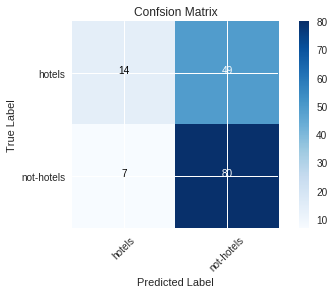

In [15]:
cm_plot_labels = ['hotels', 'not-hotels']
plot_confusion_matrix(cm, cm_plot_labels, title='Confsion Matrix' )

In [0]:
model.save('hotels.h5')

In [7]:
from keras.models import load_model
model = load_model('hotels.h5')

Instructions for updating:
Use tf.cast instead.
